In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fftpack import fft,ifft

From the plot we can see X[n] will go to infinity if t keeps going up
Simply because the probability of going up(1) is greater


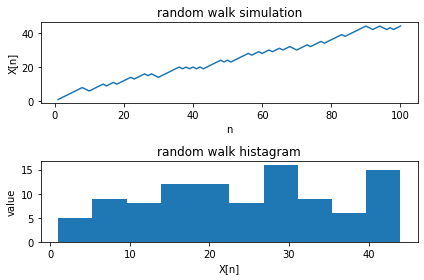

In [5]:
#1
N1 = 100
p = 3/4
data = np.random.binomial(1,p,N1)
for i in range(0, N1):
    if(data[i] == 0):
        data[i] = -1
walk = [];
for i in range(0, N1):
    walk.append(np.sum(data[0:i + 1]))

#plot the result
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax1.set_title('random walk simulation')
ax1.set_xlabel('n')
ax1.set_ylabel('X[n]')
plt.plot(np.linspace(1,N1,N1), walk)

ax2 = fig.add_subplot(2, 1, 2)
ax2.set_title('random walk histagram')
ax2.set_xlabel('X[n]')
ax2.set_ylabel('value')
plt.hist(walk)
plt.tight_layout()
print("From the plot we can see X[n] will go to infinity if t keeps going up")
print("Simply because the probability of going up(1) is greater")

            Mean of Rx[n]  Theoretical
first way        8.313111     10.25641
second way      10.320089     10.25641
The second method's answer is more close to right answer.
The second one does not need the coverege process since X[-1] already is right answer


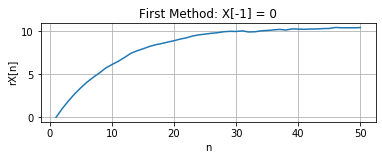

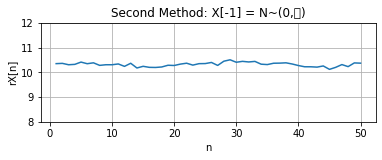

In [6]:
#2
#first way
N2 = 50
Dimension = 10000
a2 = 0.95
X2 = np.zeros((Dimension, N2))
for i in range(0, Dimension):
    U2 = np.random.normal(0,1,N2)
    for j in range(1, N2):
        X2[i][j] = a2*X2[i][j - 1] + U2[j]
X22 = []
for i in range(0, N2):
    X22.append(np.mean(X2[:, i]**2))


#second way
Y2 = np.zeros((Dimension, N2))
Y2[:,0] = np.random.normal(0, np.sqrt(1/(1 - a2*a2)), Dimension)

for i in range(0, Dimension):
    U2 = np.random.normal(0,1,N2)
    for j in range(1, N2):
        Y2[i][j] = a2*Y2[i][j - 1] + U2[j]
Y22 = []
for i in range(0, N2):
    Y22.append(np.mean(Y2[:, i]**2))
ans = np.array([[np.mean(X22), 1/(1-(a2**2))],[np.mean(Y22), 1/(1- a2**2)]])
print(pd.DataFrame(ans,columns=['Mean of Rx[n]','Theoretical'],index=['first way','second way']))

#plot the result
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax1.set_title('First Method: X[-1] = 0')
ax1.set_xlabel('n')
ax1.set_ylabel('rX[n]')
plt.plot(np.linspace(1,N2,N2), X22)
plt.grid()
fig = plt.figure()
ax2 = fig.add_subplot(2, 1, 1)
ax2.set_title('Second Method: X[-1] = N~(0,𝜎)')
ax2.set_xlabel('n')
ax2.set_ylabel('rX[n]')
plt.ylim(8,12)
plt.plot(np.linspace(1,N2,N2), Y22)
plt.grid()

print("The second method's answer is more close to right answer.")
print("The second one does not need the coverege process since X[-1] already is right answer")

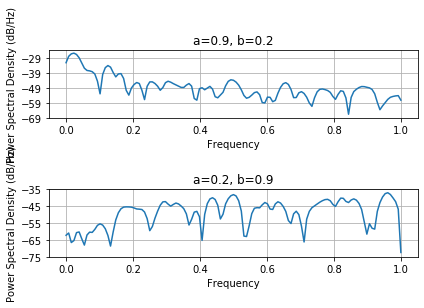

In [42]:
#3
def plotsth(a, b, X33, N3, sigmaU):
    Dimension = 10000
    X3 = np.zeros((Dimension, N3))
    X3[:,0] = np.random.normal(0, np.sqrt((a-b)**2/(1-a**2) + 1)*np.sqrt(sigmaU), Dimension)
    for i in range(0, Dimension):
        U3 = np.random.normal(0,np.sqrt(sigmaU),N3)
        for j in range(1, N3):
            X3[i][j] = a*X3[i][j - 1] + U3[j] - b* U3[j - 1]
    for i in range(0, N3):
        X33.append(np.mean(X3[:, i]))
N3 = 100
a = 0.9
b = 0.2
k = 100
X33 = []
plotsth(a, b, X33, N3, 1)

a = 0.2
b = 0.9
Y33 = []
plotsth(a, b, Y33, N3, 1)
#plot the result
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax1.set_title('a=0.9, b=0.2')
plt.psd(X33)

ax2 = fig.add_subplot(2, 1, 2)
ax2.set_title('a=0.2, b=0.9')

plt.psd(Y33)
plt.tight_layout()

#print(pd.DataFrame(ans,columns=['PSD','Theoretical'],index=['a=0.2 b=0.9','a=0.9 b=0.2']))
#print("\nCompare PSD to theoretical value(1+(a+b)^2/(1-a^2)), they are the same")

mse(min) is 0.5472585404550415


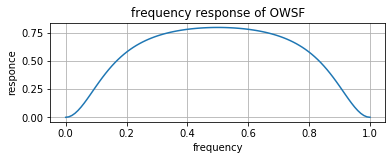

In [206]:
#4.
N4 = 100
f = np.linspace(0,1,N4)
ans = []
for i in range(N4):
    ans.append(1 - 1/(3 - 2* (np.cos(2*np.pi*f[i]))))

#plot the result
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax1.set_title('frequency response of OWSF')
ax1.set_xlabel('frequency')
ax1.set_ylabel('responce')
plt.grid()
plt.plot(f, ans)
mse = np.mean(ans)
#calculate mse(min)
print("mse(min) is {}".format(np.mean(ans)))


Text(0.5, 1.0, 'Smooth comparation')

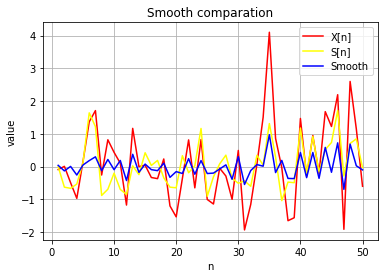

In [416]:
#5.
#just use function plotsth() in problem 3
a = 0.25
N5 = 50
varu = 0.5
vars = varu/(1 - a**2)
varw = 1
S5 = np.linspace(0,0,N5)
for n in range(N5-1):
    nn = n + 1
    if(n==0):
        S5[nn] = np.random.normal(0,np.sqrt(vars),1)
    else:
        S5[nn] = a*S5[nn - 1] + np.random.normal(0,np.sqrt(varu),1)
X5 = np.random.normal(0,np.sqrt(varw),N5) + S5
Hof = []
f = np.linspace(-0.5,0.5,N5)
for i in range(N5):
    num = varu/abs(1-a*np.exp(-j*2*np.pi*f[i]))**2
    Hof.append(num/(num+1))

yy=fft(X5)
S55 = ifft(yy*Hof).real

x_axis = np.linspace(1, N5, N5)
plt.plot(x_axis, X5, color='red', label='X[n]')
plt.plot(x_axis,S5,color='yellow', label = 'S[n]')
plt.plot(x_axis,S55,color='blue', label = 'Smooth')
plt.legend(loc = 0)
plt.grid()
plt.xlabel('n')
plt.ylabel('value')
plt.title('Smooth comparation')

In [435]:
#6.
N6 = 10000
U6 = np.random.normal(0, 1, N6 + 1)
X6 = []
for i in range(0, N6):
    X6.append(U6[i] - U6[i+1])

Rxx = []
for i in range(10):
    store = []
    for j in range(0, N6 - i):
        store.append(X6[j]*X6[j+i])
    Rxx.append(np.mean(store))
print("Rxx[k] = {}".format(Rxx))
print("It conforms to Rxx = [2, -1, 0, 0, 0, 0, 0, 0, 0, 0](k from 0 to 9)")

Rxx[k] = [2.018292429588383, -0.9916624172178533, -0.021739434739509674, -0.007123801123326393, 0.02853372375797156, -0.022931096404492014, -0.013181265693143415, 0.02779406140261513, -0.0003680604733208415, -0.01885066321886426]
It conforms to Rxx = [2, -1, 0, 0, 0, 0, 0, 0, 0, 0](k from 0 to 9)


In [406]:
#7.
N7 = 100000
lumda0 = 2
lumda1 = 5
times = 1000
def func(time, lumda):
    cal7 = 0
    T = [0]
    n77 = np.random.exponential(1/lumda,N7)
    for j in range(0, N7):
        T.append(T[j] + n77[j])
    for j in T:
        cal7 += 1
        if(j > time):
            break
    return cal7
ans = np.array([func(times,lumda0)/times,func(times,lumda1)/times])

pd.DataFrame(ans.T, columns=['average num'],index=['lambda = 2','lambda = 5'])


,average num
lambda = 2,2.001
lambda = 5,5.071


In [452]:
#8.
N8 = 100000
n8 = 2
lamda = 1
cal8 = 0
for i in range(0, N8):
    T = [0]
    n88 = np.random.exponential(lamda,n8)
    for j in range(0, n8):
        T.append(T[j] + n88[j])
    if(T[2] <= 1):
        cal8 += 1
print("the probability that T[2] <= 1 is ")
print(cal8/N8)

the probability that T[2] <= 1 is 
0.26236


In [451]:
#9.
N9 = 100000
length = 5
ans = np.zeros((N9, length))

for i in range(N9):
    n9 = np.random.binomial(1, 0.1, length)
    ans[i][0] = 0
    for j in range(1, length):
        if(n9[j] == 1):
            ans[i][j] = 1 - ans[i][j - 1]
        else:
            ans[i][j] = ans[i][j - 1]

cal = 0
for i in range(N9):
    if np.sum(ans[i]) < 0.9:
        cal += 1
print("The probability of the error:")
print(1 - cal/N9)

The probability of the error:
0.34431


In [449]:
#10.
N10 = 100000
n10 = np.random.binomial(1,1/2,3*N10)
chain = np.linspace(0,0,N10)
chain[0] = 3
j = 0
for i in range(1,N10):
    for m in [0, 1, 2, 3]:
        if int(chain[i - 1]) == m:
            if (int(chain[i - 1]) == 0):
                chain[i] = 3
            else:
                chain[i] = m - np.sum(n10[j:j+m])
            j = j + m
matrix = np.zeros((4,4))
for i in range(N10 - 1):        
    matrix[int(chain[i])][int(chain[i + 1])] += 1;
for i in range(4):
    matrix[i] /= np.sum(matrix[i])
print("we have four status: 0, 1, 2, 3")
print("transition probability matrix is as following:")
print(matrix)

we have four status: 0, 1, 2, 3
transition probability matrix is as following:
[[0.         0.         0.         1.        ]
 [0.4983045  0.5016955  0.         0.        ]
 [0.25292419 0.49711191 0.2499639  0.        ]
 [0.124841   0.37463202 0.37757587 0.12295112]]
